<a href="https://colab.research.google.com/github/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/E_20_218_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity 1**

Derive the 2-dof freedom model that will capture the first two
dominant modes of small amplitude vibration of the system.
Consider the schematic diagram of the experimental setup illustrated below along with the corresponding notations

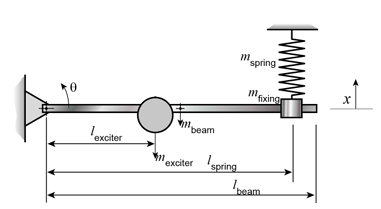

Assuming negligible damping and small-amplitude vibrations, the dynamic behavior of the system can be accurately represented by the solution of the governing partial differential equation given below

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
+ \frac{P}{\rho A}\frac{\partial^2 y}{\partial x^2}
= q(t,x)
$$


Here,
𝑦
y represents the transverse displacement of the beam,
𝑃
P is the axial compressive force,
𝜌
ρ is the material density,
𝐸
E is Young’s modulus,
𝐼
I is the second moment of area, and
𝐴
A is the cross-sectional area of the uniform beam. In this section, the axial load is assumed to be constant


since Axial force is zero, apply P = 0

$$
\frac{\partial^2 y}{\partial t^2}
+ \frac{EI}{\rho A}\frac{\partial^4 y}{\partial x^4}
= q(t,x)
$$


The solutions of the governing PDE that satisfy the boundary conditions

$$
y(0,t)=0, \quad y(L,t)=0,
$$

$$
\frac{\partial^2 y}{\partial x^2}(0,t)=0, \quad \frac{\partial^2 y}{\partial x^2}(L,t)=0
$$


accurately represent the physical behavior of the beam, where
𝐿
L is the beam length

Let 𝓕 denote the infinite-dimensional vector space of twice differentiable functions defined on the interval \([0, L]\).

Define the linear operator \(H : \mathcal{F} \rightarrow \mathcal{F}\) by

$$
H = \frac{EI}{\rho A}\frac{\partial^4}{\partial x^4}.
$$

Then, the equation of motion can be written as

$$
\frac{\partial^2 y}{\partial t^2} + Hy = q(t,x).
$$


The operator \(H\) maps a transverse deflection profile to the corresponding acceleration generated purely by beam bending, subject to the boundary conditions of the beam.

Let \(H\) possess distinct positive eigenvalues \(\{\omega_k^2\}_{k=1}^{\infty}\), with associated eigenfunctions \(\{\psi_k(x)\}_{k=1}^{\infty}\), which represent the vibration mode shapes of the system.

The corresponding eigenvalue problem is defined as

$$
H\psi_k(x) = \omega_k^2 \psi_k(x).
$$

Substituting the definition of the operator \(H\), we obtain

$$
\frac{EI}{\rho A}\frac{d^4 \psi_k(x)}{dx^4} = \omega_k^2 \psi_k(x).
$$

This expression can be rearranged as

$$
\frac{d^4 \psi_k(x)}{dx^4}
=
\frac{\rho A \omega_k^2}{EI}\psi_k(x)
=
\beta_k^4 \psi_k(x).
$$


General solution for 4th order differential equation

$$
\frac{d^4 \psi(x)}{dx^4} = \beta^4 \psi(x)
$$

$$
\psi(x) = C_1 e^{\beta x} + C_2 e^{-\beta x}
+ C_3 \cos(\beta x) + C_4 \sin(\beta x)
$$


$$
\psi(x) = C_1 e^{\beta x} + C_2 e^{-\beta x}
+ C_3 \cos(\beta x) + C_4 \sin(\beta x)
$$

$$
\psi(0)= C_1 + C_2 + C_3 = 0
$$

$$
\psi'(0)= \beta(C_1 - C_2 + C_4)=0
$$

$$
\psi''(L)= C_1 e^{\beta L} + C_2 e^{-\beta L}
- C_3 \cos(\beta L) - C_4 \sin(\beta L)=0
$$

$$
\psi'''(L)= C_1 e^{\beta L} - C_2 e^{-\beta L}
+ C_3 \sin(\beta L) - C_4 \cos(\beta L)=0
$$


The above equations form a linear homogeneous system.

$$
H(\beta)
\begin{bmatrix}
C_1 \\
C_2 \\
C_3 \\
C_4
\end{bmatrix}
= 0.
$$

Here, \(H(\beta)\) is a \(4 \times 4\) matrix, that is,

$$
H(\beta) \in \mathbb{M}_{4 \times 4}.
$$

The characteristic matrix \(H(\beta)\) is given explicitly by

$$
H(\beta)=
\begin{bmatrix}
1 & 1 & 1 & 0 \\
1 & -1 & 0 & 1 \\
e^{\beta L} & e^{-\beta L} & -\cos(\beta L) & -\sin(\beta L) \\
e^{\beta L} & -e^{-\beta L} & \sin(\beta L) & -\cos(\beta L)
\end{bmatrix}.
$$


Characteristic determinant

In [ ]:
import numpy as np
from numpy.linalg import det
from scipy.optimize import brentq
from scipy.linalg import svd
import matplotlib.pyplot as plt


# ========= Characteristic Determinant =========
def char_det(beta, L):
    bL = beta * L

    H = np.array([
        [1,  1,  1,  0],
        [1, -1,  0,  1],
        [np.exp(bL), np.exp(-bL), -np.cos(bL), -np.sin(bL)],
        [np.exp(bL),-np.exp(-bL),  np.sin(bL), -np.cos(bL)]
    ])

    return det(H)


Root finder for β values

In [ ]:
def find_betas(L, n_roots=2, beta_max=40):
    betas = []
    beta_vals = np.linspace(0.1, beta_max, 5000)

    f_vals = [char_det(b, L) for b in beta_vals]

    for i in range(len(beta_vals)-1):
        if f_vals[i] * f_vals[i+1] < 0:
            root = brentq(char_det, beta_vals[i], beta_vals[i+1], args=(L,))
            betas.append(root)

            if len(betas) >= n_roots:
                break

    return np.array(betas)


Solve for coefficients
𝐶
1
,
𝐶
2
,
𝐶
3
,
𝐶
4

	​


	​


In [ ]:
# ========= Mode Shape Coefficients =========
def mode_shape_coefficients(beta, L):
    bL = beta * L

    H = np.array([
        [1,  1,  1,  0],
        [1, -1,  0,  1],
        [np.exp(bL), np.exp(-bL), -np.cos(bL), -np.sin(bL)],
        [np.exp(bL),-np.exp(-bL),  np.sin(bL), -np.cos(bL)]
    ])

    # SVD to get null-space vector
    U, S, Vh = svd(H)
    v = Vh[-1, :]   # smallest singular value vector

    C1, C2, C3, C4 = v
    return C1, C2, C3, C4


The eigenvalues of the operator \(H\) are given by

$$
\{\omega_k^2\}_{k=1}^{\infty}
=
\left\{
\frac{EI}{\rho A}\beta_k^4
\right\}_{k=1}^{\infty}.
$$

Here, the parameters \(\beta_k\) are obtained from the numerical solution of the characteristic equation.

The corresponding eigenfunctions (mode shapes) are given by

$$
\{\psi_k(x)\}_{k=1}^{\infty}
=
\left\{
C_{1k} e^{\beta_k x}
+ C_{2k} e^{-\beta_k x}
+ C_{3k} \cos(\beta_k x)
+ C_{4k} \sin(\beta_k x)
\right\}_{k=1}^{\infty}.
$$

The constants \(C_{1k}\), \(C_{2k}\), \(C_{3k}\), and \(C_{4k}\) are determined using the numerical procedure implemented earlier.


**Forced Vibration**

When the oscillator is switched on, the system experiences forced vibration as a result of the oscillating force
𝑄
Q.

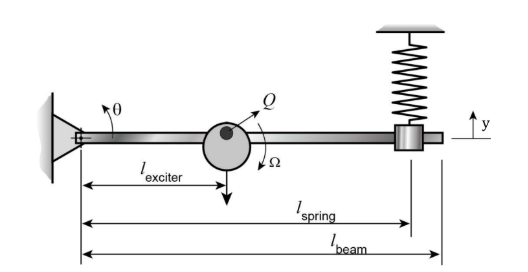

In the absence of base excitation, the external load acting on the beam is assumed to be

$$
q(x,t) = Q \sin(\Omega t)\,\delta(x - l_{\text{exciter}}).
$$

The system can then be modeled as a set of decoupled, forced, and damped single-degree-of-freedom oscillators for each vibration mode \(k\), such that

$$
\ddot{y} + C\dot{y} + Hy = q(x,t)
$$

which leads to the modal equation

$$
m_k \ddot{z}_k + 2\zeta_k \omega_k m_k \dot{z}_k + m_k \omega_k^2 z_k
= \langle \psi_k(x), q(x,t) \rangle.
$$

Here, the modal damping ratio and modal mass are defined as

$$
\zeta_k = \frac{c}{2\omega_k},
$$

$$
m_k = \int_{0}^{l_{\text{beam}}} \rho A\,\psi_k^2(x)\,dx.
$$

The modal masses normalize the arbitrary scaling introduced by the choice of the mode shape coefficients.

Solving the decoupled ordinary differential equation for each mode \(k\) yields the steady-state response

$$
z_k(t) = X_k(\Omega)\cos\!\big(\Omega t + \phi_k(\Omega)\big),
$$

where $X_k(\Omega)$ denotes the steady-state amplitude and $\phi_k(\Omega)$ represents the phase lag of the $k$th modal coordinate at the forcing frequency $\Omega$.


Let us now derive explicit expressions for the quantities defined above.

The mode shapes are orthonormal with respect to the inner product defined as

$$
\langle \psi_k(x), q(x,t) \rangle
=
\int_{0}^{l_{\text{beam}}} \psi_k(x)\,q(x,t)\,dx.
$$

Substituting the expression for the external forcing,

$$
q(x,t) = Q\sin(\Omega t)\,\delta(x - l_{\text{exciter}}),
$$

the inner product becomes

$$
\langle \psi_k(x), q(x,t) \rangle
=
\int_{0}^{l_{\text{beam}}} \psi_k(x)\,Q\sin(\Omega t)\,
\delta(x - l_{\text{exciter}})\,dx.
$$

Evaluating the integral using the sifting property of the Dirac delta function yields

$$
\langle \psi_k(x), q(x,t) \rangle
=
Q\sin(\Omega t)\,\psi_k(l_{\text{exciter}}).
$$

By definition, the steady-state amplitude of the $k$th modal coordinate is given by

$$
X_k(\Omega)
=
\frac{\left|\langle \psi_k(x), q(x,t) \rangle\right|}
{m_k\sqrt{(\omega_k^2-\Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}.
$$

Substituting the evaluated modal force term gives

$$
X_k(\Omega)
=
\frac{Q\,\psi_k(l_{\text{exciter}})}
{m_k\sqrt{(\omega_k^2-\Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}.
$$

The corresponding phase lag for the $k$th mode is expressed as

$$
\phi_k(\Omega)
=
\arctan\!\left(
\frac{2\zeta_k\Omega\omega_k}{\omega_k^2-\Omega^2}
\right).
$$

The infinite-dimensional response of the system can therefore be written as

$$
y(t,x)
=
\sum_{k=1}^{\infty} z_k(t)\psi_k(x)
=
\sum_{k=1}^{\infty}
X_k(\Omega)\cos\!\big(\Omega t + \phi_k(\Omega)\big)\psi_k(x).
$$


\textbf{Reduction to a 2-DOF Model with a Localized Spring–Damper Attachment}

By truncating the infinite-dimensional response to the first two dominant vibration modes, the transverse displacement of the beam can be approximated as

$$
y(t,x) \approx
X_1(\Omega)\cos\!\big(\Omega t + \phi_1(\Omega)\big)\psi_1(x)
+
X_2(\Omega)\cos\!\big(\Omega t + \phi_2(\Omega)\big)\psi_2(x).
$$

The corresponding two-degree-of-freedom system can be expressed in matrix form as

$$
\underbrace{
\begin{bmatrix}
m_1 & 0 \\
0 & m_2
\end{bmatrix}
}_{M_{\text{beam}}}
\begin{bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
2\zeta_1\omega_1 m_1 & 0 \\
0 & 2\zeta_2\omega_2 m_2
\end{bmatrix}
}_{C_{\text{beam}}}
\begin{bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{bmatrix}
+
\underbrace{
\begin{bmatrix}
\omega_1^2 m_1 & 0 \\
0 & \omega_2^2 m_2
\end{bmatrix}
}_{K_{\text{beam}}}
\begin{bmatrix}
z_1 \\
z_2
\end{bmatrix}
=
\underbrace{
\begin{bmatrix}
Q\,\psi_1(l_{\text{exciter}})\sin(\Omega t) \\
Q\,\psi_2(l_{\text{exciter}})\sin(\Omega t)
\end{bmatrix}
}_{F_{\text{exciter}}}.
$$

The effects of the localized spring and viscous damper attachment are incorporated in the subsequent formulation.


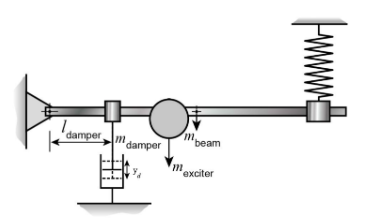

\textbf{Part I: Inclusion of Additional Mass Effects}

For improved accuracy, the formulation accounts for the effective contribution of the spring mass, namely the portion that participates in the motion and adds to the total inertia of the system. According to Rayleigh’s theory, this effective contribution is equal to one-third of the spring mass. In addition, the mass associated with the spring–beam connection must also be considered.

$$
m_{\text{eff}} = \frac{1}{3}m_{\text{spring}} + m_{\text{fixed}}.
$$

The transverse acceleration at the location of the spring attachment is expressed as

$$
\ddot{y}(l_{\text{spring}},t)
=
\ddot{z}_1(t)\psi_1(l_{\text{spring}})
+
\ddot{z}_2(t)\psi_2(l_{\text{spring}}).
$$

The inertial force generated by the attached mass is therefore given by

$$
F_{\text{inertia}}(t)
=
m_{\text{eff}}\,\ddot{y}(l_{\text{spring}},t).
$$

Projecting this inertial force onto the modal coordinates results in

$$
\begin{bmatrix}
F_1^{(m)} \\
F_2^{(m)}
\end{bmatrix}
=
M_{\text{spring}}
\begin{bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{bmatrix},
$$

where the additional mass matrix associated with the spring attachment is defined as

$$
M_{\text{spring}}
=
m_{\text{eff}}
\begin{bmatrix}
\psi_1^2(l_{\text{spring}}) &
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) \\
\psi_1(l_{\text{spring}})\psi_2(l_{\text{spring}}) &
\psi_2^2(l_{\text{spring}})
\end{bmatrix}.
$$

In a similar manner, the additional mass contributions arising from the damper and the exciter can be represented as

$$
M_{\text{damper}}
=
m_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix},
$$

and

$$
M_{\text{exciter}}
=
m_{\text{exciter}}
\begin{bmatrix}
\psi_1^2(l_{\text{exciter}}) &
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) \\
\psi_1(l_{\text{exciter}})\psi_2(l_{\text{exciter}}) &
\psi_2^2(l_{\text{exciter}})
\end{bmatrix}.
$$


**Part II: Inclusion of the Damper Attachment**

By applying the constitutive relation for a viscous damper, the damping force acting on the system can be expressed as

$$
F_{\mathrm{damper}}(t) = c_{\mathrm{damper}}\,\dot{y}(l_{\mathrm{damper}},t).
$$

Under the two-mode approximation, the transverse velocity of the beam at the damper location is given by

$$
\dot{y}(l_{\mathrm{damper}},t)
=
\dot{z}_1(t)\psi_1(l_{\mathrm{damper}})
+
\dot{z}_2(t)\psi_2(l_{\mathrm{damper}}).
$$

The modal damping force acting on the \(k\)th mode is obtained by projecting the physical damping force onto the corresponding mode shape, yielding

$$
F_k^{(c)}(t)
=
c_{\mathrm{damper}}
\big(
\dot{z}_1(t)\psi_1(l_{\mathrm{damper}})
+
\dot{z}_2(t)\psi_2(l_{\mathrm{damper}})
\big)
\psi_k(l_{\mathrm{damper}}).
$$

This expression can be written compactly in matrix form as

$$
\begin{bmatrix}
F_1^{(c)} \\
F_2^{(c)}
\end{bmatrix}
=
C_{\mathrm{damper}}
\begin{bmatrix}
\dot{z}_1 \\
\dot{z}_2
\end{bmatrix}.
$$

The additional damping matrix associated with the damper attachment is defined as

$$
C_{\mathrm{damper}}
=
c_{\mathrm{damper}}
\begin{bmatrix}
\psi_1^2(l_{\mathrm{damper}}) &
\psi_1(l_{\mathrm{damper}})\psi_2(l_{\mathrm{damper}}) \\
\psi_1(l_{\mathrm{damper}})\psi_2(l_{\mathrm{damper}}) &
\psi_2^2(l_{\mathrm{damper}})
\end{bmatrix}.
$$

The dynamic and inertial contributions arising from the spring, damper, and exciter can now be incorporated into the reduced two-degree-of-freedom model of the system.

Accordingly, the final reduced-order governing equation of motion is given by

$$
\left(
M_{\mathrm{beam}} + M_{\mathrm{spring}} + M_{\mathrm{damper}} + M_{\mathrm{exciter}}
\right)\ddot{z}
+
\left(
C_{\mathrm{beam}} + C_{\mathrm{damper}}
\right)\dot{z}
+
K_{\mathrm{beam}} z
=
F_{\mathrm{exciter}}.
$$

Here, the matrices \(M\), \(C\), and \(K\) belong to \(\mathbb{R}^{2\times 2}\), while the displacement and force vectors \(z\) and \(F\) belong to \(\mathbb{R}^{2}\).


In [ ]:
# =========================================================
# Beam Geometric and Material Parameters
# =========================================================
b = 0.025
h = 0.01
A = b * h
m_beam = 1.65
l_beam = 0.815
E = 2e11
I = b * h**3 / 12
rho = m_beam / (A * l_beam)


# =========================================================
# Spring Characteristics
# =========================================================
k_spring = 3800
l_spring = 0.75
m_spring = 0.388
m_fixed = 0.009

# Equivalent rotational stiffness at the beam root
k_theta = k_spring * l_spring**2


# =========================================================
# Damper Parameters
# =========================================================
l_damper = 0.2
m_damper = 0.53


# =========================================================
# Excitation System Properties
# =========================================================
m_exciter = 4.2
l_exciter = 0.4


# =========================================================
# Extraction of the First Two Eigenvalues
# =========================================================
roots = find_betas(l_beam, n_roots=2)
beta1, beta2 = roots

print(f"beta1 = {beta1:.4f}, beta2 = {beta2:.4f}")


# =========================================================
# Mode Shape Evaluation Function
# =========================================================
def psi(x, beta, l_beam):
    C1, C2, C3, C4 = mode_shape_coefficients(beta, l_beam)
    return (
        C1*np.cosh(beta*x)
        + C2*np.sinh(beta*x)
        + C3*np.cos(beta*x)
        + C4*np.sin(beta*x)
    )


# =========================================================
# Mode Shape Values at Attachment Locations
# =========================================================
psi1_spring = psi(l_spring, beta1, l_beam)
psi2_spring = psi(l_spring, beta2, l_beam)

psi1_damper = psi(l_damper, beta1, l_beam)
psi2_damper = psi(l_damper, beta2, l_beam)

psi1_exciter = psi(l_exciter, beta1, l_beam)
psi2_exciter = psi(l_exciter, beta2, l_beam)

print(f"psi1(l_spring) = {psi1_spring:.4f}, psi2(l_spring) = {psi2_spring:.4f}")
print(f"psi1(l_damper) = {psi1_damper:.4f}, psi2(l_damper) = {psi2_damper:.4f}")
print(f"psi1(l_exciter) = {psi1_exciter:.4f}, psi2(l_exciter) = {psi2_exciter:.4f}")


# =========================================================
# Modal Mass Calculation
# =========================================================
def modal_mass(beta):
    integrand = lambda x: rho * A * psi(x, beta, l_beam)**2
    m, _ = quad(integrand, 0, l_beam)
    return m

m1 = modal_mass(beta1)
m2 = modal_mass(beta2)


# =========================================================
# Natural Frequencies of the Beam (Uncoupled)
# =========================================================
omega1 = beta1**2 * np.sqrt(E*I/(rho*A))
omega2 = beta2**2 * np.sqrt(E*I/(rho*A))

print(f"Modal mass m1 = {m1:.4f} kg, m2 = {m2:.4f} kg")
print(f"Natural frequencies: omega1 = {omega1:.4f} rad/s, omega2 = {omega2:.4f} rad/s")

beta1 = 2.3007, beta2 = 5.7596
psi1(l_spring) = -2.3839, psi2(l_spring) = 21.1762
psi1(l_damper) = 0.0063, psi2(l_damper) = 1.1126
psi1(l_exciter) = -0.7157, psi2(l_exciter) = 3.6505
Modal mass m1 = 2.7472 kg, m2 = 172.1544 kg
Natural frequencies: omega1 = 75.9393 rad/s, omega2 = 475.9036 rad/s


In [ ]:
# =========================================================
# Beam Modal Mass and Stiffness Matrices
# =========================================================
M_beam = np.array([[m1, 0.0],
                   [0.0, m2]])

K_beam = np.array([[m1 * omega1**2, 0.0],
                   [0.0, m2 * omega2**2]])


# =========================================================
# Effective Mass Contribution from the Spring Assembly
# =========================================================
m_eff_spring = (1/3) * m_spring + m_fixed

M_spring = m_eff_spring * np.array([
    [psi1_spring**2, psi1_spring * psi2_spring],
    [psi1_spring * psi2_spring, psi2_spring**2]
])


# =========================================================
# Additional Mass Matrix due to the Damper Attachment
# =========================================================
M_damper = m_damper * np.array([
    [psi1_damper**2, psi1_damper * psi2_damper],
    [psi1_damper * psi2_damper, psi2_damper**2]
])


# =========================================================
# Mass Matrix Associated with the Exciter Assembly
# =========================================================
M_exciter = m_exciter * np.array([
    [psi1_exciter**2, psi1_exciter * psi2_exciter],
    [psi1_exciter * psi2_exciter, psi2_exciter**2]
])


# =========================================================
# Utility Function for Neatly Displaying Matrices
# =========================================================
def print_matrix(name, mat):
    print(f"{name}:")
    for row in mat:
        print("  [" + ", ".join(f"{val:10.3f}" for val in row) + "]")
    print()  # Add spacing between outputs


# =========================================================
# Display All Computed Mass and Stiffness Matrices
# =========================================================
print_matrix("M_beam", M_beam)
print_matrix("M_spring", M_spring)
print_matrix("M_damper", M_damper)
print_matrix("M_exciter", M_exciter)
print_matrix("K_beam", K_beam)


M_beam:
  [     2.747,      0.000]
  [     0.000,    172.154]

M_spring:
  [     0.786,     -6.983]
  [    -6.983,     62.033]

M_damper:
  [     0.000,      0.004]
  [     0.004,      0.656]

M_exciter:
  [     2.151,    -10.973]
  [   -10.973,     55.969]

K_beam:
  [ 15842.789,      0.000]
  [     0.000, 38990268.018]



\textbf{Activity 2: Estimation of Damping Ratios for the Two Dominant Modes}

We begin by recalling the governing equation of motion for the system with the attached components, which is given by

$$
M\ddot{z} + C\dot{z} + Kz = F_{\text{exciter}},
$$

where the system matrices are defined as

$$
M = M_{\text{beam}} + M_{\text{spring}} + M_{\text{damper}} + M_{\text{exciter}}, \quad
C = C_{\text{beam}} + C_{\text{damper}}, \quad
K = K_{\text{beam}}.
$$

To analyze the free vibration characteristics of the system, we consider the homogeneous form of the above equation,

$$
M\ddot{z} + C\dot{z} + Kz = 0.
$$

Assuming a solution of the form

$$
z(t) = \phi e^{i\omega t},
$$

and neglecting damping effects, the undamped response is used to determine the natural frequencies and mode shapes of the system. Substitution of this assumed solution leads to the eigenvalue problem

$$
(K - \omega^2 M)\phi = 0,
$$

with the corresponding characteristic equation

$$
\det(K - \omega^2 M) = 0.
$$

Solving this eigenvalue problem yields two natural frequencies, \(\omega_1\) and \(\omega_2\), along with their associated eigenvectors \(\phi_1\) and \(\phi_2\), where \(\phi \in \mathbb{R}^2\).

The modal matrix is then constructed as

$$
\Phi =
\begin{bmatrix}
\phi_1 & \phi_2
\end{bmatrix}.
$$

We now proceed to compute the numerical values of the above quantities.


In [ ]:
from scipy.linalg import eigh
# =========================================================
# Computation of Natural Frequencies for the Complete System
# =========================================================
M = M_beam + M_spring + M_damper + M_exciter
K = K_beam

eigvals, eigvecs = eigh(K, M)
omega_n = np.sqrt(eigvals)

print("Natural frequencies considering attached components:")
for i, w in enumerate(omega_n, 1):
    print(f"Mode {i}: {w:.3f} rad/s = {w/(2*np.pi):.3f} Hz")


# =========================================================
# Modal Matrix Corresponding to the Full System
# =========================================================
Phi = eigvecs
print_matrix("Modal Matrix", Phi)


Natural frequencies considering attached components:
Mode 1: 52.682 rad/s = 8.385 Hz
Mode 2: 408.935 rad/s = 65.084 Hz
Modal Matrix:
  [    -0.418,      0.210]
  [     0.001,      0.065]



Consider the introduction of a new set of generalized coordinates \( q(t) \), defined through the modal transformation

$$
z(t) = \Phi q(t).
$$

Using this transformation, the forced vibration equation of the system can be expressed as

$$
M\Phi \ddot{q} + C\Phi \dot{q} + K\Phi q = F_{\text{exciter}}.
$$

Premultiplying the above equation by \( \Phi^{T} \), the corresponding modal equations are obtained as

$$
\Phi^{T}M\Phi \ddot{q}
+ \Phi^{T}C\Phi \dot{q}
+ \Phi^{T}K\Phi q
= \Phi^{T}F_{\text{exciter}}.
$$

Defining the modal mass, damping, and stiffness matrices as

$$
M_m = \Phi^{T}M\Phi, \quad
C_m = \Phi^{T}C\Phi, \quad
K_m = \Phi^{T}K\Phi,
$$

and the modal force vector as

$$
F_m = \Phi^{T}F_{\text{exciter}},
$$

the governing equations in modal coordinates reduce to

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = F_m.
$$

For the undamped eigenvectors of the pair \( (K, M) \), the modal mass and stiffness matrices \( M_m \) and \( K_m \) are diagonal.

Considering the free vibration response, the governing equation becomes

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = 0.
$$

In the modal formulation, each mode behaves as an independent single-degree-of-freedom oscillator provided that the damping matrix does not introduce modal coupling, that is, when \( C_m \) is also diagonal.

From the definition of the modal damping ratio,

$$
\zeta_k = \frac{c_k}{2m_k\omega_k},
$$

the damping ratio of the complete system can be written as

$$
\zeta_k
=
\frac{\phi_k^{T} C \phi_k}
{2\omega_k \phi_k^{T} M \phi_k}.
$$

Since the total damping matrix is given by

$$
C = C_{\text{beam}} + C_{\text{damper}},
$$

and its exact form is not known a priori, an appropriate damping model must be constructed.

It is already known that the beam damping matrix \( C_{\text{beam}} \) is diagonal from the modal reduction of the beam alone, while the contribution from the damper attachment is given by

$$
C_{\text{damper}}
=
c_{\text{damper}}
\begin{bmatrix}
\psi_1^2(l_{\text{damper}}) &
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) \\
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) &
\psi_2^2(l_{\text{damper}})
\end{bmatrix}.
$$

We now proceed by considering the mode shapes of the beam alone.


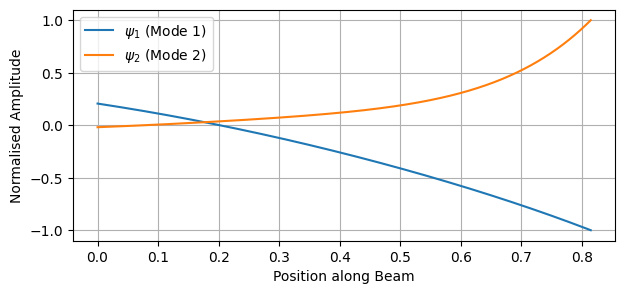

In [ ]:
# =========================================================
# Mode Shapes of the Beam Only
# =========================================================
x = np.linspace(0, l_beam, 1000)

psi1 = psi(x, beta1, l_beam)
psi2 = psi(x, beta2, l_beam)

# Normalize mode shapes
psi1_norm = psi1 / np.max(np.abs(psi1))
psi2_norm = psi2 / np.max(np.abs(psi2))

plt.figure(figsize=(7, 3))
plt.plot(x, psi1_norm, label=r'$\psi_1$ (Mode 1)')
plt.plot(x, psi2_norm, label=r'$\psi_2$ (Mode 2)')

plt.xlabel('Position along Beam')
plt.ylabel('Normalised Amplitude')
plt.grid(True)
plt.legend()
plt.show()


From the preceding results, it can be assumed that at the damper location
$l_{\text{damper}} = 0.2\,\text{m}$, the first-mode contribution is much smaller than that of the second mode, that is,
$\psi_1(l_{\text{damper}}) \ll \psi_2(l_{\text{damper}})$.
Specifically, the previously computed values are

$$
\psi_1(l_{\text{damper}}) = -0.2491, \qquad
\psi_2(l_{\text{damper}}) = 0.7102,
$$

which give

$$
\psi_1^2(l_{\text{damper}}) = 0.5044, \qquad
\psi_1(l_{\text{damper}})\psi_2(l_{\text{damper}}) = -0.1769.
$$

Since $\psi_1(l_{\text{damper}}) \ll \psi_2(l_{\text{damper}})$, the off-diagonal terms of the damping matrix
$C_{\text{damper}}$ are small and may be neglected, indicating weak modal coupling.

Accordingly, Rayleigh (proportional) damping is assumed for the system, such that

$$
C = \alpha M + \beta K.
$$

The modal damping contribution can then be written as

$$
\phi_k^{T} C \phi_k
= \alpha \phi_k^{T} M \phi_k + \beta \phi_k^{T} K \phi_k. \tag{3}
$$

Recalling the undamped eigenvalue relation

$$
(K - \omega_k^2 M)\phi_k = 0,
$$

it follows that

$$
\phi_k^{T} K \phi_k = \omega_k^2 \phi_k^{T} M \phi_k.
$$

Substituting this result into equation (3) yields

$$
\phi_k^{T} C \phi_k
= \alpha \phi_k^{T} M \phi_k
+ \beta \omega_k^2 \phi_k^{T} M \phi_k
= (\alpha + \beta \omega_k^2)\phi_k^{T} M \phi_k.
$$

Substituting into the definition of the modal damping ratio gives

$$
\zeta_k
=
\frac{(\alpha + \beta \omega_k^2)\phi_k^{T} M \phi_k}
{2\omega_k \phi_k^{T} M \phi_k}
=
\frac{1}{2}\left(\frac{\alpha}{\omega_k} + \beta \omega_k\right).
$$

Since $\psi_1(l_{\text{damper}}) \ll \psi_2(l_{\text{damper}})$, the damper is located closer to the antinode of the second mode than the first. Consequently, damping predominantly affects the second mode, particularly at higher frequencies.

Therefore, stiffness-proportional damping may be assumed for this system, such that $\alpha = 0$, giving

$$
\zeta_k = \frac{\beta \omega_k}{2}.
$$

Given that the maximum operating frequency of the exciter in the experimental setup is $17\,\text{Hz}$ and
$\omega_2 > 17\,\text{Hz}$, only the first modal damping ratio can be experimentally identified at $\omega_1$.
Using this relation, the damping coefficients can be expressed as

$$
\zeta_1 = \frac{\beta \omega_1}{2}, \qquad
\zeta_2 = \frac{\beta \omega_2}{2}
= \zeta_1 \frac{\omega_2}{\omega_1}.
$$

Finally, the damped natural response at the assumed first mode is considered, as observed experimentally.


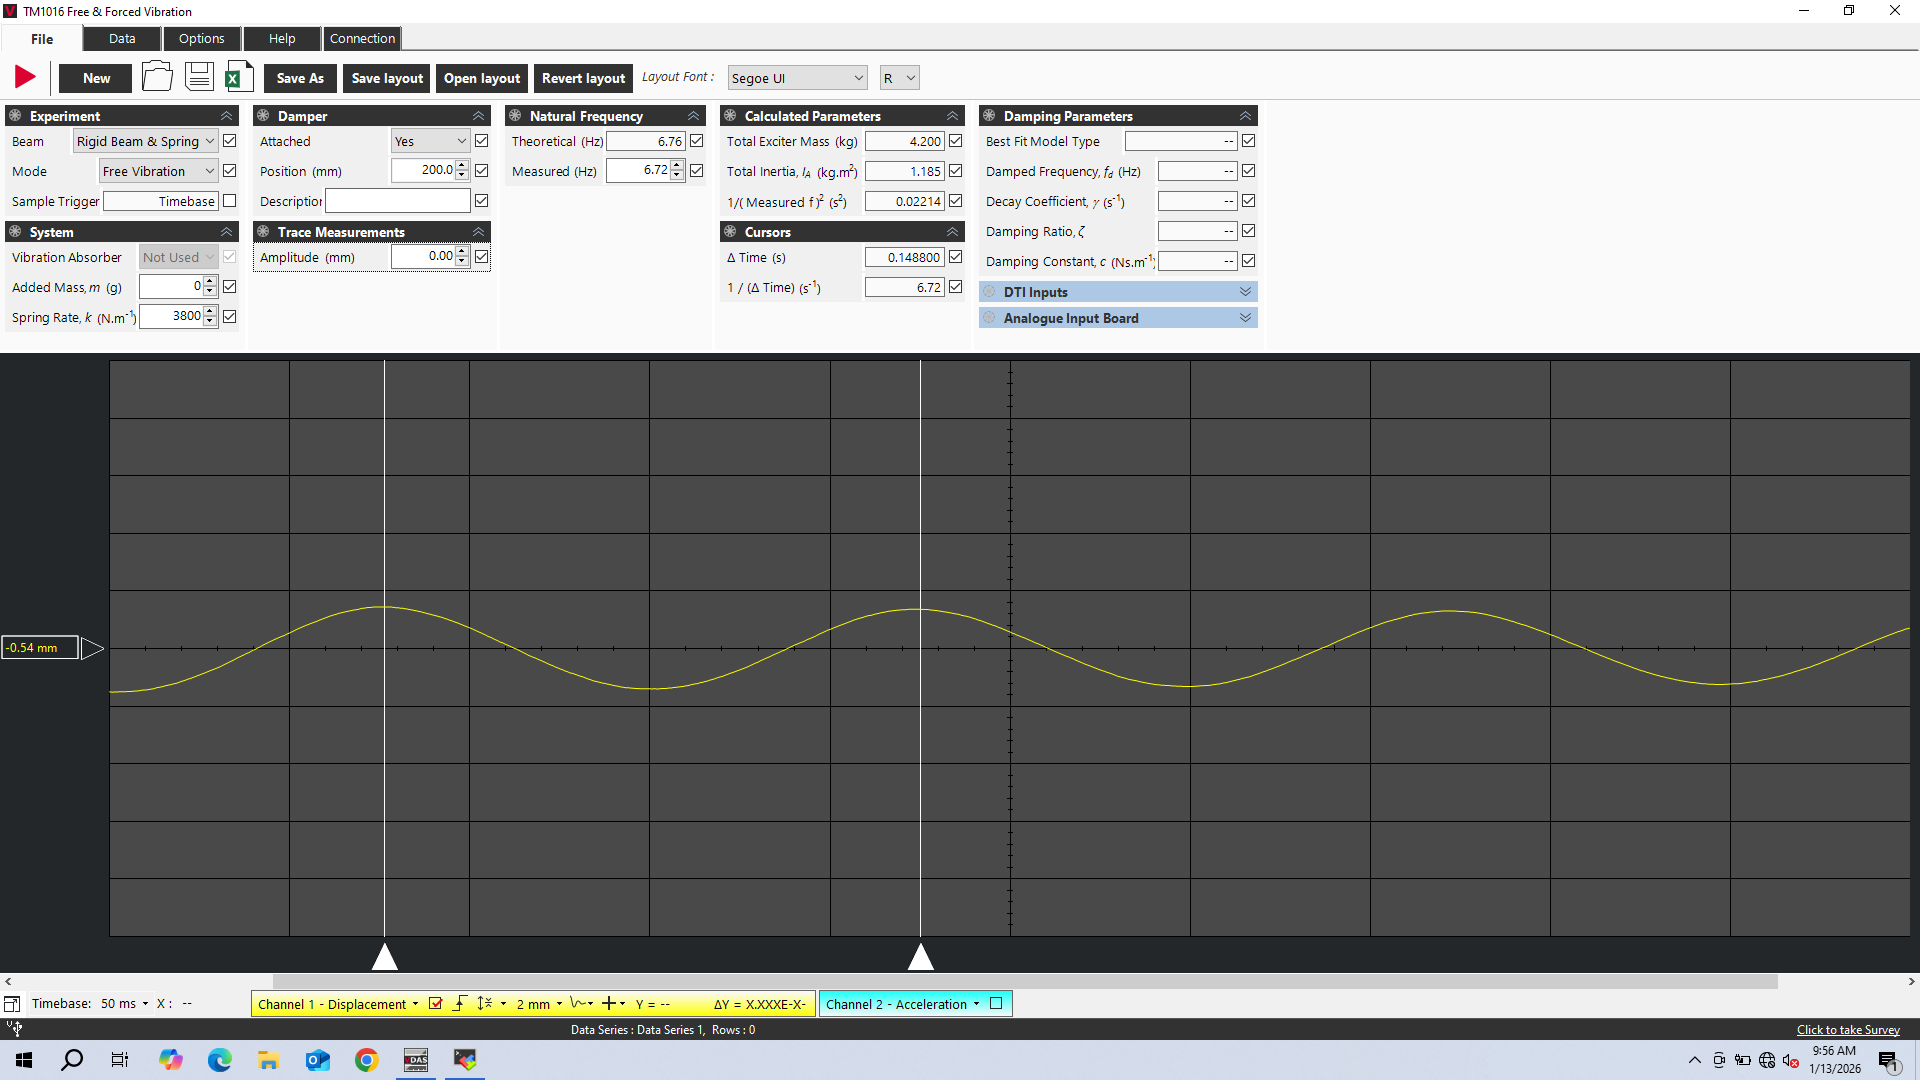

Since the initial displacement is applied at the free end of the beam, the subsequent free-decay response is primarily governed by the first vibration mode, which exhibits its maximum displacement (antinode) at the free end. Consequently, the damping ratio identified from the measured decay response corresponds to the first modal damping ratio, denoted by $\zeta_1$.

Using the proportional damping relationship, the damping ratio of the second mode can be estimated as

$$
\zeta_2 = \zeta_1 \frac{\omega_2}{\omega_1}.
$$

Substituting the numerical values of the natural frequencies gives

$$
\zeta_2 = 0.008 \times \frac{204.048~\text{rad/s}}{32.472~\text{rad/s}},
$$

which yields

$$
\zeta_2 \approx 0.05.
$$

Therefore, the estimated damping ratios corresponding to the first two dominant vibration modes are obtained as above.


\textbf{Activity 3: Graphical Representation of Selected Parameters}

\textbf{3.1 Unforced Response Due to an Initial Displacement at the Spring End of the Beam}

Starting from the modal coordinates of the complete system, the physical displacement vector can be expressed as

$$
z(t) = \Phi q(t),
$$

or equivalently,

$$
\begin{bmatrix}
z_1(t) \\
z_2(t)
\end{bmatrix}
=
\begin{bmatrix}
\phi_{11} & \phi_{12} \\
\phi_{21} & \phi_{22}
\end{bmatrix}
\begin{bmatrix}
q_1(t) \\
q_2(t)
\end{bmatrix}.
$$

Recalling the truncated two-degree-of-freedom representation of the beam displacement,

$$
y(x,t) = z_1(t)\psi_1(x) + z_2(t)\psi_2(x),
$$

the displacement field can be rewritten to account for the full system with attachments as

$$
y(x,t)
=
(\phi_{11} q_1(t) + \phi_{12} q_2(t))\psi_1(x)
+
(\phi_{21} q_1(t) + \phi_{22} q_2(t))\psi_2(x).
$$

Rearranging terms gives

$$
y(x,t)
=
(\phi_{11}\psi_1(x) + \phi_{21}\psi_2(x))q_1(t)
+
(\phi_{12}\psi_1(x) + \phi_{22}\psi_2(x))q_2(t),
$$

where the effective mode shapes of the complete system are defined as

$$
\psi_1^{*}(x) = \phi_{11}\psi_1(x) + \phi_{21}\psi_2(x), \qquad
\psi_2^{*}(x) = \phi_{12}\psi_1(x) + \phi_{22}\psi_2(x).
$$

Let the initial displacement at the beam tip be prescribed as

$$
y(l_{\text{beam}}, 0) = y_0.
$$

This leads to the relation

$$
y_0 = \psi_1^{*}(l_{\text{beam}})q_1(0) + \psi_2^{*}(l_{\text{beam}})q_2(0).
$$

Since two unknown modal coordinates are present and the initial displacement is applied at the free end of the beam, the response is assumed to be dominated by the first mode. Hence, the initial conditions reduce to

$$
q_2(0) = 0,
\qquad
q_1(0) = \frac{y_0}{\psi_1^{*}(l_{\text{beam}})}.
$$

To determine the time histories of \(q_1(t)\) and \(q_2(t)\), the following system of ordinary differential equations governing the unforced response must be solved:

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = 0,
$$

which may also be written in expanded form as

$$
M_m \ddot{q} + \beta K_m \dot{q} + K_m q = 0,
$$

with the initial conditions

$$
q(0) =
\begin{bmatrix}
q_1(0) \\
0
\end{bmatrix},
\qquad
\dot{q}(0) =
\begin{bmatrix}
0 \\
0
\end{bmatrix}.
$$

Here, the parameter \(\beta\) is defined as

$$
\beta = \frac{2\zeta_1}{\omega_1} = \frac{2\zeta_2}{\omega_2}.
$$

Once the modal coordinates \(q_1(t)\) and \(q_2(t)\) have been obtained, the final expression for the damped free-vibration response is recovered by substituting back into

$$
y(x,t) = \psi_1^{*}(x)q_1(t) + \psi_2^{*}(x)q_2(t).
$$


In [ ]:
# =========================================================
# Prescribed Initial Displacement at the Beam Tip
# =========================================================
y_o = 0.003         # Initial displacement magnitude (m)

phi11 = Phi[0, 0]
phi12 = Phi[0, 1]
phi21 = Phi[1, 0]
phi22 = Phi[1, 1]


# =========================================================
# Effective Mode Shapes of the Complete System
# =========================================================
def psi_star_1(x):
    return phi11 * psi(x, beta1, l_beam, E*I, k_theta) + \
           phi21 * psi(x, beta2, l_beam, E*I, k_theta)

def psi_star_2(x):
    return phi12 * psi(x, beta1, l_beam, E*I, k_theta) + \
           phi22 * psi(x, beta2, l_beam, E*I, k_theta)


# =========================================================
# Initial Modal Coordinate Calculation
# =========================================================
psi_star_1_l_beam = psi_star_1(l_beam)
print(f"psi_star_1(l_beam) = {psi_star_1_l_beam:.4f}")

q1_0 = y_o / psi_star_1_l_beam
print(f"Initial modal coordinate q1_0 = {q1_0:.4f}")


# =========================================================
# Modal Mass, Damping, and Stiffness Matrices
# =========================================================
M_m = Phi.T @ M @ Phi
K_m = Phi.T @ K @ Phi

zeta1 = 0.008
zeta2 = 0.05

# Rayleigh damping coefficient based on first mode
beta = 2 * zeta1 / omega_n[0]

C_m = beta * K_m


TypeError: psi() takes 3 positional arguments but 5 were given

In [ ]:
# =============== ODE solution for Free Vibration ================
def system_ode(q_vec, t, M_m_inv, C_m, K_m):
    q1, q2, q1_dot, q2_dot = q_vec
    q = np.array([q1, q2])
    q_dot = np.array([q1_dot, q2_dot])

    # M_m_inv * (-C_m * q_dot - K_m * q)
    q_ddot = M_m_inv @ (-C_m @ q_dot - K_m @ q)

    return [q1_dot, q2_dot, q_ddot[0], q_ddot[1]]

M_m_inv = np.linalg.inv(M_m)

q1_0_val = q1_0
q2_0_val = 0.0

q_dot1_0 = 0.0
q_dot2_0 = 0.0

q_initial = [q1_0_val, q2_0_val, q_dot1_0, q_dot2_0]

t = np.arange(0, 10, 0.001)

solution = odeint(system_ode, q_initial, t, args=(M_m_inv, C_m, K_m))

# Homogeneous solution for Free Vibration
q1h_t = solution[:, 0]
q2h_t = solution[:, 1]

In [ ]:
# =============== Damped Natural Response at Free End ================
z1_t = np.zeros_like(t)
z2_t = np.zeros_like(t)

for i in range(len(t)):
    q_vector = np.array([q1h_t[i], q2h_t[i]])
    z_vector = Phi @ q_vector
    z1_t[i] = z_vector[0]
    z2_t[i] = z_vector[1]

psi1_l_beam = psi(l_beam, beta1, l_beam, E*I, k_theta)
psi2_l_beam = psi(l_beam, beta2, l_beam, E*I, k_theta)

y_l_beam_t = z1_t * psi1_l_beam + z2_t * psi2_l_beam

plt.figure(figsize=(10, 3))
plt.plot(t, y_l_beam_t)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Unforced Response at the Free End of the Beam')
plt.grid(True)
plt.show()

In [ ]:
y_x_t = np.zeros((len(t), len(x)))

# =============== Animated Beam Response y(x,t) ================
for i in range(len(t)):
    def psi_star_1_full(x_vals):
        return (phi11 * psi(x_vals, beta1, l_beam, E*I, k_theta) +
                phi21 * psi(x_vals, beta2, l_beam, E*I, k_theta))

    def psi_star_2_full(x_vals):
        return (phi12 * psi(x_vals, beta1, l_beam, E*I, k_theta) +
                phi22 * psi(x_vals, beta2, l_beam, E*I, k_theta))

    y_x_t[i, :] = (
        psi_star_1_full(x) * q1h_t[i] +
        psi_star_2_full(x) * q2h_t[i]
    )

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlim(0, l_beam)

max_disp = np.max(np.abs(y_x_t)) * 1.1
ax.set_ylim(-max_disp, max_disp)

ax.set_xlabel('Position along Beam (m)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Beam Vibration a (Unforced Response)')
ax.grid(True)

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, y_x_t[i, :])
    return line,

skip = 10
frames_idx = range(0, len(t), skip)

animation = FuncAnimation(
    fig, animate, init_func=init, frames=frames_idx,
    interval=int((t[1] - t[0]) * skip * 1000),
    blit=True)

plt.close(fig)
HTML(animation.to_html5_video()) # Use Colab Notebook


\textbf{3.2 Forced Response for Three Selected Motor Rotation Speeds}

We now consider the forced vibration response of the complete reduced-order system.  
The governing equations in modal coordinates are given by

$$
M_m \ddot{q} + C_m \dot{q} + K_m q = F_m,
$$

where the modal forcing vector is defined as

$$
F_m = \Phi^{T} F_{\text{exciter}},
$$

and the physical excitation force applied by the motor is expressed as

$$
F_{\text{exciter}} =
\begin{bmatrix}
Q(\Omega)\psi_1(l_{\text{exciter}})\sin(\Omega t) \\
Q(\Omega)\psi_2(l_{\text{exciter}})\sin(\Omega t)
\end{bmatrix}.
$$

The excitation amplitude due to the rotating unbalance of the motor can be written as

$$
Q(\Omega) = m_{\text{ecc}}\, r\, \Omega^{2},
$$

where \(m_{\text{ecc}}\) denotes the eccentric mass and \(r\) is the radial offset of the eccentric mass associated with the servomotor exciter.

The resulting system of non-homogeneous ordinary differential equations can then be solved to obtain the particular solution \(q(t)\) corresponding to the applied harmonic forcing. Once the modal responses are determined, the physical displacement response of the beam can be reconstructed for plotting purposes using

$$
y(x,t) = \psi_1^{*}(x)q_1(t) + \psi_2^{*}(x)q_2(t).
$$


In [ ]:
# =============== Input Exciter Parameters ================
Omega_1 = 32.472    # Near first resonance
Omega_2 = 100.0     # Intermediate
Omega_3 = 204.048   # Near second resonance

Omega_list = [Omega_1, Omega_2, Omega_3]

m_ecc =  0.0045     # Eccentric mass x 2 (kg)
r     =  0.035      # Offset (m)

def compute_Q(m_ecc, r, Omega):
    #return 1.0
    return 2 * m_ecc * r * Omega**2


# =============== ODE solution for Forced Vibration ================
t = np.arange(0, 7.5, 0.001)

def system_ode_forced(q_vec, t, M_m_inv, C_m, K_m, Omega, Q, psi_star_l):
    q1, q2, q1_dot, q2_dot = q_vec
    q = np.array([q1, q2])
    q_dot = np.array([q1_dot, q2_dot])

    f_physical = psi_star_l * Q * np.sin(Omega * t)

    # Forced equation of motion
    q_ddot = M_m_inv @ (f_physical - C_m @ q_dot - K_m @ q)

    return [q1_dot, q2_dot, q_ddot[0], q_ddot[1]]

# Initial conditions
q_initial = [0.0, 0.0, 0.0, 0.0]

psi_star_l = np.array([psi_star_1(l_exciter), psi_star_2(l_exciter)])

#Solutions for Three Motor Speeds
solutions = []

for Omega in Omega_list:

    Q = compute_Q(m_ecc, r, Omega)

    solution = odeint(system_ode_forced, q_initial, t,
    args=(M_m_inv, C_m, K_m, Omega, Q, psi_star_l)
    )

    solutions.append(solution)


# =============== Animated Beam Response y(x,t) ================
for idx, Omega in enumerate(Omega_list):

    solution = solutions[idx]
    q1_t = solution[:, 0]
    q2_t = solution[:, 1]

    y_x_t = np.zeros((len(t), len(x)))
    for i in range(len(t)):
        y_x_t[i, :] = (
            psi_star_1_full(x) * q1_t[i] +
            psi_star_2_full(x) * q2_t[i]
        )

    fig, ax = plt.subplots(figsize=(7, 3))
    ax.set_xlim(0, l_beam)

    max_disp = np.max(np.abs(y_x_t)) * 1.1
    ax.set_ylim(-max_disp, max_disp)

    ax.set_xlabel('Position along Beam (m)')
    ax.set_ylabel('Displacement (m)')
    ax.set_title(f'Forced Response, Ω = {Omega:.2f} rad/s')
    ax.grid(True)

    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        line.set_data(x, y_x_t[i, :])
        return line,

    skip = 10
    frames_idx = range(0, len(t), skip)

    animation = FuncAnimation(
        fig, animate, init_func=init, frames=frames_idx,
        interval=int((t[1] - t[0]) * skip * 1000),
        blit=True
    )

    plt.close(fig)
    display(HTML(animation.to_html5_video())) # Use Colab Notebook

\textbf{3.3 Theoretical Frequency Response of the System Capturing the First Two Dominant Modes}

The frequency response function of the system is defined as the ratio between the steady-state displacement amplitude and the applied force amplitude, given by

$$
G(x,\Omega) = \frac{Y(x,\Omega)}{Q(\Omega)}.
$$

To incorporate the effects of the attachments into the modal response, the modal amplitude and phase can be expressed as

$$
\chi_k(\Omega)
=
\left|
\frac{Q(\Omega)\psi_k(l_{\text{exciter}})}
{M_{m,k}\sqrt{(\omega_k^2 - \Omega^2)^2 + 4\zeta_k^2\Omega^2\omega_k^2}}
\right|,
$$

and

$$
\phi_k(\Omega)
=
\arctan\!\left(
\frac{2\zeta_k\Omega\omega_k}{\omega_k^2 - \Omega^2}
\right).
$$

Here, \(\omega_k\) and \(\zeta_k\) represent the natural frequencies and damping ratios of the complete system with attachments.

The physical displacement response may then be written in modal form as

$$
y(x,t) = \psi_1^{*}(x)q_1(t) + \psi_2^{*}(x)q_2(t),
$$

where the modal coordinates under harmonic excitation are given by

$$
q_k(t) = \chi_k(\Omega)\cos\big(\Omega t + \phi_k(\Omega)\big).
$$

Substituting these expressions into the displacement equation yields

$$
y(x,t)
=
\chi_1(\Omega)\cos(\Omega t + \phi_1(\Omega))\psi_1^{*}(x)
+
\chi_2(\Omega)\cos(\Omega t + \phi_2(\Omega))\psi_2^{*}(x).
$$

Using the identity
\(
\cos(\Omega t + \phi) = \Re\{e^{j(\Omega t + \phi)}\},
\)
the displacement can be rewritten in complex form as

$$
y(x,t)
=
\Re\left\{
\left[
\chi_1(\Omega)\psi_1^{*}(x)e^{j\phi_1(\Omega)}
+
\chi_2(\Omega)\psi_2^{*}(x)e^{j\phi_2(\Omega)}
\right]e^{j\Omega t}
\right\}.
$$

Factoring out the time-dependent exponential term allows the frequency-domain displacement to be identified as

$$
Y(x,\Omega)
=
\chi_1(\Omega)\psi_1^{*}(x)e^{j\phi_1(\Omega)}
+
\chi_2(\Omega)\psi_2^{*}(x)e^{j\phi_2(\Omega)}.
$$

Recalling that the magnitude and phase information are embedded in the complex form of the modal response, the frequency-domain displacement may be written explicitly as

$$
Y(x,\Omega)
=
\frac{Q(\Omega)\psi_1(l_{\text{exciter}})\psi_1^{*}(x)}
{M_{m,1}\big[(\omega_1^2 - \Omega^2) + j2\zeta_1\Omega\omega_1\big]}
+
\frac{Q(\Omega)\psi_2(l_{\text{exciter}})\psi_2^{*}(x)}
{M_{m,2}\big[(\omega_2^2 - \Omega^2) + j2\zeta_2\Omega\omega_2\big]}.
$$

Dividing through by the force amplitude \(Q(\Omega)\), the frequency response function is finally obtained as

$$
G(x,\Omega)
=
\frac{\psi_1(l_{\text{exciter}})\psi_1^{*}(x)}
{M_{m,1}\big[(\omega_1^2 - \Omega^2) + j2\zeta_1\Omega\omega_1\big]}
+
\frac{\psi_2(l_{\text{exciter}})\psi_2^{*}(x)}
{M_{m,2}\big[(\omega_2^2 - \Omega^2) + j2\zeta_2\Omega\omega_2\big]}.
$$

Through this expression, the magnitude of \(G(x,\Omega)\) provides the displacement amplitude response, while the argument of \(G(x,\Omega)\) gives the corresponding phase response of the system.


In [ ]:
# ======================= Input Beam Positions for FRF =========================
x1 = l_beam
x2 = l_damper
x3 = 0.5       # Near node of second mode

x_vals_f = np.array([x1, x2, x3])

psi1_x = np.array([psi_star_1(x) for x in x_vals_f])
psi2_x = np.array([psi_star_2(x) for x in x_vals_f])

psi1_le = psi_star_1(l_exciter)
psi2_le = psi_star_2(l_exciter)

omega_1, omega_2 = omega_n[0], omega_n[1]

M_m1 = M_m[0, 0]
M_m2 = M_m[1, 1]

# =========================== Evaluation of FRF ================================
def G(x_idx, Omega):

    denom1 = (omega_1**2 - Omega**2) + 1j * (2 * zeta1 * Omega * omega_1)
    denom2 = (omega_2**2 - Omega**2) + 1j * (2 * zeta2 * Omega * omega_2)

    term1 = (psi1_le * psi1_x[x_idx]) / (M_m1 * denom1)
    term2 = (psi2_le * psi2_x[x_idx]) / (M_m2 * denom2)

    return term1 + term2

In [ ]:
# ============ Frequency Response at 3 Selected Positions on Beam ==============
Omega_vals = np.linspace(0.01, 300, 600)

G_all = np.zeros((3, len(Omega_vals)), dtype=complex)

for i in range(3):
    for j, Omega in enumerate(Omega_vals):
        G_all[i, j] = G(i, Omega)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Magnitude in dB
for i in range(3):
    axs[0].plot(Omega_vals, 20 * np.log10(np.abs(G_all[i])), label=f"$x_{i+1}$")
axs[0].set_xlabel(r"
")
axs[0].set_ylabel(r"
 [dB]")
axs[0].set_title("FRF Magnitude (dB)")
axs[0].legend()
axs[0].grid(True)

# Phase (unwrap for clarity)
for i in range(3):
    axs[1].plot(Omega_vals, np.unwrap(np.angle(G_all[i])), label=f"$x_{i+1}$")
axs[1].set_xlabel(r"
")
axs[1].set_ylabel(r"
 [rad]")
axs[1].set_title("FRF Phase")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

**\textbf{Activity 4: Experimental Characterisation of the System Frequency Response Near Resonance — Determination of \(\omega_d\) and \(y_{\max}\) with Theoretical Comparison}**

To ensure a valid comparison between experimental and theoretical results, the response analysis is performed at the same spatial location on the beam. Accordingly, the observation point is selected as \(x = 0.5\,\text{m}\), corresponding to the position of the displacement sensor in the experimental setup.

It should be noted that the displacement sensor is located close to a nodal point of the second vibration mode. As a result, the frequency characteristics associated with the second mode are not evident in the experimental measurements, which is consistent with the predictions obtained from the theoretical \(\psi_2\) mode shape.

Moreover, since the maximum excitation frequency of the motor is limited to \(17\,\text{Hz}\), the experimental investigation is confined to the characterisation of the first resonant mode.

\textbf{Experimental Frequency Response}
